# Principal component analysis (PCA)

PCA is a reduction method commonly used to reduce variables into components that can help optimize Machine learning tasks.

## Exploring data

Data: cancer dataset from sklearn. It contains a binary variable (malign and benign) and continuous variables that can be used as explanatory variables of the binary variable. With PCA, we can reduce the variables into components that matter most to explain the data and use the components in regressions, for example.

In [191]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt

import sklearn
from sklearn import datasets

In [192]:
from sklearn import decomposition
from sklearn.decomposition import PCA

# import data 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [193]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Scale data

In [195]:
from sklearn.preprocessing import scale

# Remove "target"

df = df.drop(['target'], axis = 1)
#Scalling the data
X = scale(df)

## Run model

In [196]:
pca = PCA()
iris_pca = pca.fit_transform(X)

In [197]:
pca.explained_variance_ratio_.sum()

1.0

In [198]:
# Create table with explained variance and cummulative variance

pcaDF = pd.DataFrame({"expl_var": pca.explained_variance_ratio_, "pc": range(1,31), 
                     "cum_var": pca.explained_variance_ratio_.cumsum()})

pcaDF

,expl_var,pc,cum_var
0,0.442720,1,0.442720
1,0.189712,2,0.632432
2,0.093932,3,0.726364
3,0.066021,4,0.792385
4,0.054958,5,0.847343
5,0.040245,6,0.887588
6,0.022507,7,0.910095
7,0.015887,8,0.925983
8,0.013896,9,0.939879
9,0.011690,10,0.951569


Seven components (components 0 to 6) explain 91% of the data. We can work with these seven components. The scree plot below also suggest that 4-8 components are enough to explain the data.

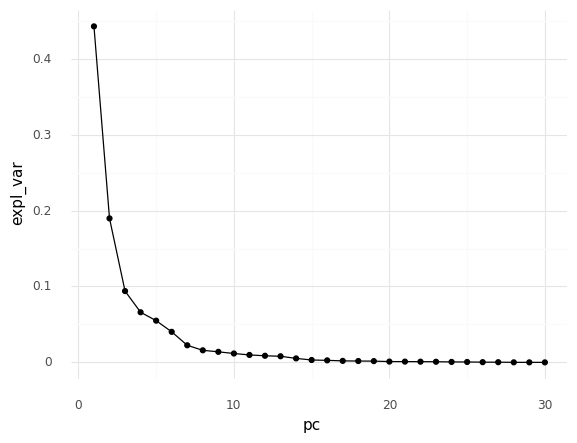

<ggplot: (-9223371855103316434)>

In [199]:
# Scree plot for component limit setting

from plotnine import ggplot, aes, geom_line, geom_point, theme_minimal

plt = (ggplot(pcaDF, aes(x = "pc", y="expl_var"))+ geom_line() + geom_point() + theme_minimal())
plt

In [200]:
# PRINT PCA COMPONENTS to see importance of variables for each component

# Get variable names from sklearn data
variable_names = cancer.feature_names

comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


In [201]:
# Let's check the variables that matter most in the first component

#Separate first component
comp_0 = comps.iloc[0, :]

# Order the variables by importance
comp_0 = comp_0.sort_values(ascending = False)
comp_0

mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean fractal dimension     0.064363
symmetry error             0

Concave indices are the most important in component 1. In general, "mean" and "worst" indices have a higher impact in this component.

In [202]:
# You can use components to run regressions. 
# Let's try a logistic regression trying to explain the outcome (malign and benign) with 4 and 8 components

comps_4 = pca.transform(X)
Comps_4 = pd.DataFrame(comps_4[:, 0:4])

comps_8 = pca.transform(X)
Comps_8 = pd.DataFrame(comps_8[:, 0:8])

In [203]:
# Calculate accuracy score of regression models

# Get target variable
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

from sklearn.linear_model import LogisticRegression

Logreg_4 = LogisticRegression()
Logreg_4.fit(Comps_4, df['target'])
print("Accuracy score Log Regression with 4 components:", Logreg_4.score(Comps_4, df['target']))

Logreg_8 = LogisticRegression()
Logreg_8.fit(Comps_8, df['target'])
print("Accuracy score Log Regression with 8 components:", Logreg_8.score(Comps_8, df['target']))

Accuracy score Log Regression with 4 components: 0.9701230228471002
Accuracy score Log Regression with 8 components: 0.984182776801406


We lose very little accuracy with 4 components, but the computational cost is smaller.